# Open a "gite" in Umbria (ITALY)

## Introduction

We would like to open a "Gite" / B&B in Umbria (Italy). Umbria is a region of central Italy. It includes various marvelous turist locations such as Lake Trasimeno and Marmore Falls, Perugia and Assisi. Umbria is known for its landscapes, traditions, history, culinary delights, artistic legacy, and influence on culture. 
We don't know directly the region and we would like to study the zone to see which is the best location to start our activity.

## Scope and Data

To chose the possible location of our Gite, the Data that we are going to use are first of all 
the list of all city and village of the region. 
From these we see what is more frequent in each neighborhood. 
Taking these data into account we aim to chose a plase/region with a lot of activity/restaurant/caffe 
but with a low density of hotel/B&B, in such way we would chose a place where we don't have a lot 
of direct concurrents but still a lot of turism attraction.

## Data Collection

In [2]:

import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors



In [3]:
link = 'http://www.dossier.net/utilities/coordinate-geografiche/provincia-perugia.htm'

df = pd.read_html(link,keep_default_na=False,header =0)[0]

In [4]:
df.head(5)

,denominazione,latitudine,longitudine
0,Assisi,43.070167,12.617518
1,Bastia Umbra,43.067956,12.551450
2,Bettona,43.013681,12.485417
3,Bevagna,42.934870,12.609389
4,Campello sul Clitunno,42.820357,12.776778


In [5]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

In [14]:
df.latitudine.head(5)

0    43.070167
1    43.067956
2    43.013681
3    42.934870
4    42.820357
Name: latitudine, dtype: float64

In [22]:
df.denominazione

0                         Assisi
1                   Bastia Umbra
2                        Bettona
3                        Bevagna
4          Campello sul Clitunno
5                        Cannara
6                         Cascia
7                 Castel Ritaldi
8           Castiglione del Lago
9             Cerreto di Spoleto
10                       Citerna
11             Città della Pieve
12             Città di Castello
13                    Collazzone
14                      Corciano
15                   Costacciaro
16                        Deruta
17                       Foligno
18               Fossato di Vico
19                 Fratta Todina
20             Giano dell'Umbria
21               Gualdo Cattaneo
22                 Gualdo Tadino
23                        Gubbio
24              Lisciano Niccone
25                       Magione
26                     Marsciano
27                 Massa Martana
28       Monte Castello di Vibio
29    Monte Santa Maria Tiberina
30        

In [27]:
df[df.denominazione == 'Perugia']

,denominazione,latitudine,longitudine
38,Perugia,43.110701,12.389172


In [58]:
umbria_map = folium.Map(location=[43.11, 12.39], zoom_start=9)
#umbria_map = folium.Map(location=[df.latitudine[df.denominazione == 'Perugia'], df.longitudine[df.denominazione == 'Perugia']], zoom_start=11)

In [95]:
for lat, long in zip(df['latitudine'], df['longitudine']):
#    label = "{} ({}): {}".format(borough, post, neigh)
#    popup = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        #popup=popup,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(umbria_map)

In [113]:
umbria_map

Turist Locations

In [83]:
#url = 'https://www.google.com/maps/search/cose+da+visitare+umbria/@42.841871,12.0345739,9z/data=!3m1!4b1?hl=fr'

In [84]:
#import shutil
#import requests

In [85]:
#page = requests.get(url)
#print('Loaded page with: %s' % page)

#sitemap_index = BeautifulSoup(page.content, 'html.parser')
#print('Created %s object' % type(sitemap_index))

Loaded page with: <Response [200]>
Created <class 'bs4.BeautifulSoup'> object


In [86]:
from geopy.geocoders import Nominatim 
import requests

In [ ]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)results = requests.get(url).json()

In [100]:
link = 'https://www.tuttitalia.it/umbria/19-comuni/densita/'
dff = pd.read_html(link,keep_default_na=False,header =0)[0]

In [101]:
dff.head(5)

,Unnamed: 0,Comune,Popolazioneresidenti,Superficiekm²,Densitàabitanti/km²,Altitudinem s.l.m.
0,1.0,PGBastia Umbra,21.781,2760,789,202
1,2.0,TRTERNI,110.749,21243,521,130
2,3.0,PGPERUGIA,165.956,44951,369,493
3,4.0,PGCorciano,21.391,6372,336,408
4,5.0,PGDeruta,9.705,4451,218,218


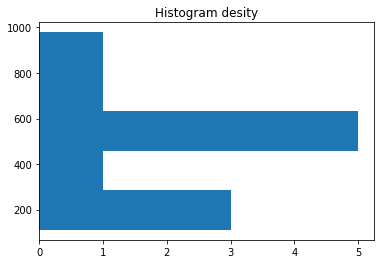

In [112]:
import matplotlib.pyplot as plt
prr = plt.hist(dff.Popolazioneresidenti[dff.Popolazioneresidenti > 100], bins='auto',orientation = 'horizontal') 
plt.title("Histogram desity")
plt.show()

## Conclusion

In [ ]:
The northen part of the region seems to be the optimal one.
There are restaurant and attraction, also from the vicity tuscany region and less hotel/B&B then the rest of the region
Finally the region of città di Castello seems to be the most suitable to implant our activity
